<a href="https://colab.research.google.com/github/Phavour-EBEN/Deep-Learning-with-Udacity/blob/main/Cats_Dogs_Image_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
# _URL = '/content/sample_data/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
zip_dir

'/root/.keras/datasets/cats_and_dogs_filterted.zip'

In [5]:
# listing all the directories
zip_dir_based = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

.
./.config
./.config/configurations
./.config/logs
./.config/logs/2024.10.10
./sample_data


In [6]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [7]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [8]:
print("Current working directory:", os.getcwd())

# Define and print directory paths
train_cats_dir = '/root/cats_and_dogs_filtered/train/cats'
train_dogs_dir = '/root/cats_and_dogs_filtered/train/dogs'
validation_cats_dir = '/root/cats_and_dogs_filtered/validation/cats'
validation_dogs_dir = '/root/cats_and_dogs_filtered/validation/dogs'

print("Train cats directory:", train_cats_dir)
print("Train dogs directory:", train_dogs_dir)
print("Validation cats directory:", validation_cats_dir)
print("Validation dogs directory:", validation_dogs_dir)

Current working directory: /content
Train cats directory: /root/cats_and_dogs_filtered/train/cats
Train dogs directory: /root/cats_and_dogs_filtered/train/dogs
Validation cats directory: /root/cats_and_dogs_filtered/validation/cats
Validation dogs directory: /root/cats_and_dogs_filtered/validation/dogs


In [9]:
num_cats_tr, num_dogs_tr, num_cats_val, num_dogs_val, total_train, total_val

(1000, 1000, 500, 500, 2000, 1000)

In [10]:
image_size = 150
batch_size = 100

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [11]:
train_dataset = train_image_generator.flow_from_directory(directory=train_dir,
                                                          target_size=(image_size, image_size),
                                                          shuffle=True,
                                                          batch_size=batch_size,
                                                          class_mode='binary')

val_dataset = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                            target_size=(image_size, image_size),
                                                            shuffle=True,
                                                            batch_size=batch_size,
                                                            class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
eg_train_img = next(train_dataset)

In [13]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

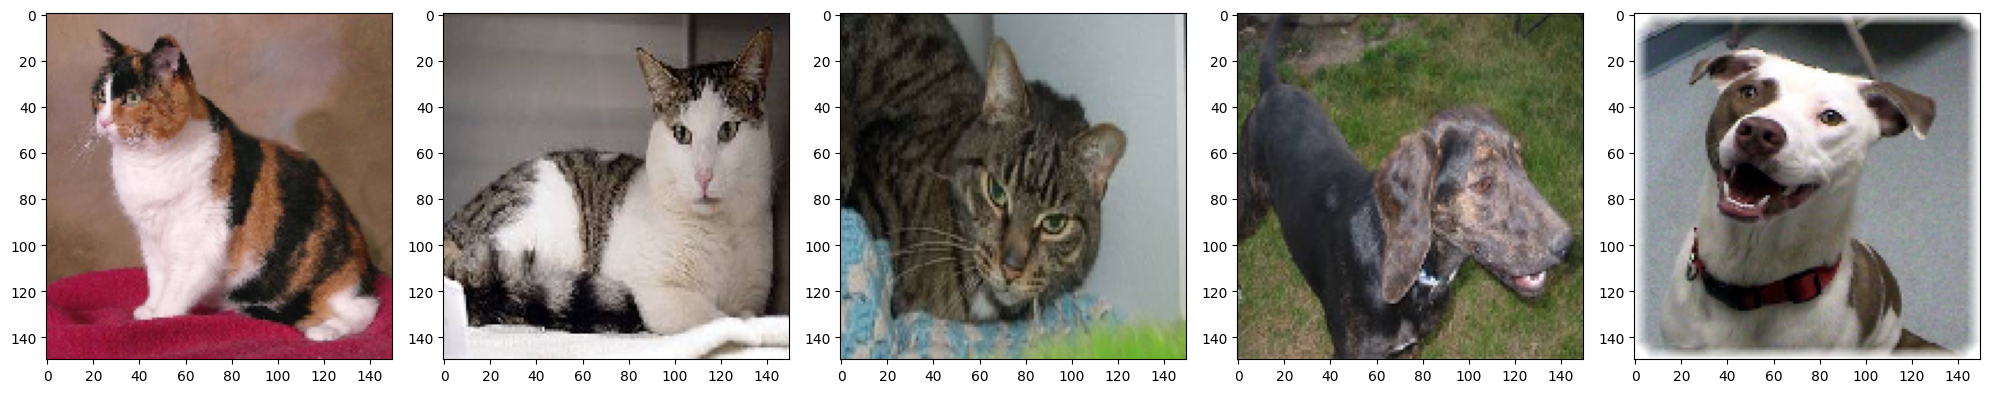

In [14]:
plot_images(eg_train_img[0][:5])

**Model Building**

In [15]:
# model defination
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))

model.add(tf.keras.layers.Dense(2))

# model compilation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# model summaary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,634 (13.17 MB)

 Trainable params: 3,453,634 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# fiting the model
epochs = 50
history = model.fit(
    train_dataset,
    steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
    epochs=epochs,
    validation_data=val_dataset
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 361ms/step - accuracy: 0.4878 - loss: 0.8043 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.5579 - loss: 0.6850 - val_accuracy: 0.5610 - val_loss: 0.6771
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5610 - val_loss: 0.6771
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - accuracy: 0.5614 - loss: 0.6761 - val_accuracy: 0.6480 - val_loss: 0.6227
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6480 - val_loss: 0.6227
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 262ms/step - accuracy: 0.6345 - loss: 0.6266 - val_accuracy: 0.6130 - val_loss: 0.6431
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.0000e+00 - loss:

Visaulizing the results

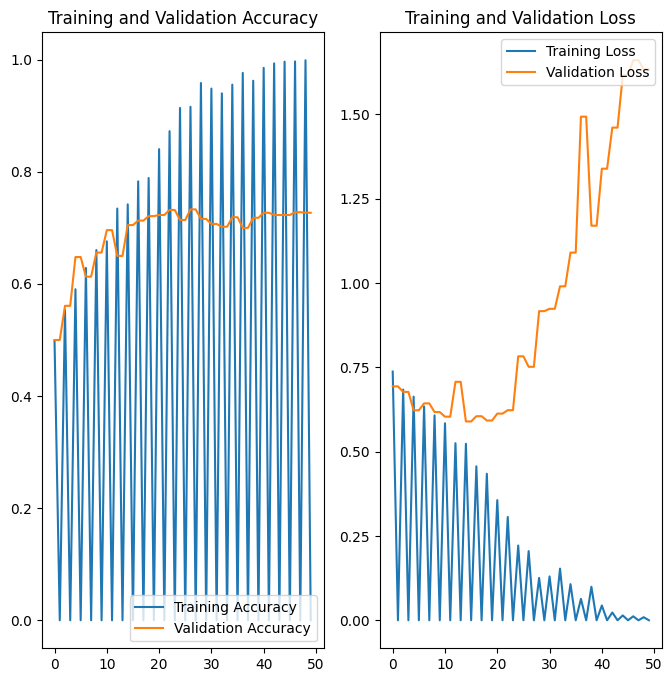

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()